In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/AI and Manchine Learning/FruitinAmazon.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# data.data.districts
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
# generators -> divide all the data to batches
# each time batch is loaded on RAM and remove after job done and
# process continues until all batches done
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/FruitinAmazon/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 128,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/FruitinAmazon/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 128,
    image_size = (256, 256)
)



Found 90 files belonging to 6 classes.
Found 30 files belonging to 6 classes.


In [ ]:
#for testing only
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
# Load a sample dataset (MNIST for simplicity)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Normalize and reshape data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1) # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)
# Define a simple CNN model
model = keras.Sequential([
layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation="relu"),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128, activation="relu"),
layers.Dense(10, activation="softmax") # 10 classes for MNIST digits
])
# Compile the model
model.compile(optimizer="adam",

loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
# Make predictions
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted labels:", predicted_labels)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9095 - loss: 0.2953 - val_accuracy: 0.9863 - val_loss: 0.0410
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9860 - loss: 0.0461 - val_accuracy: 0.9902 - val_loss: 0.0309
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9911 - loss: 0.0281 - val_accuracy: 0.9889 - val_loss: 0.0326
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9933 - loss: 0.0203 - val_accuracy: 0.9906 - val_loss: 0.0273
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9957 - loss: 0.0136 - val_accuracy: 0.9908 - val_loss: 0.0301
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9881 - loss: 0.0405
Test accuracy: 0.9908
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
Predicted labels: [7 2 1 0 4]


#Task 1: Data Understanding and Visualization:

In [ ]:
train_ds.class_names


['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']

In [ ]:
# {image, lablels} =  train_ds.take(1)

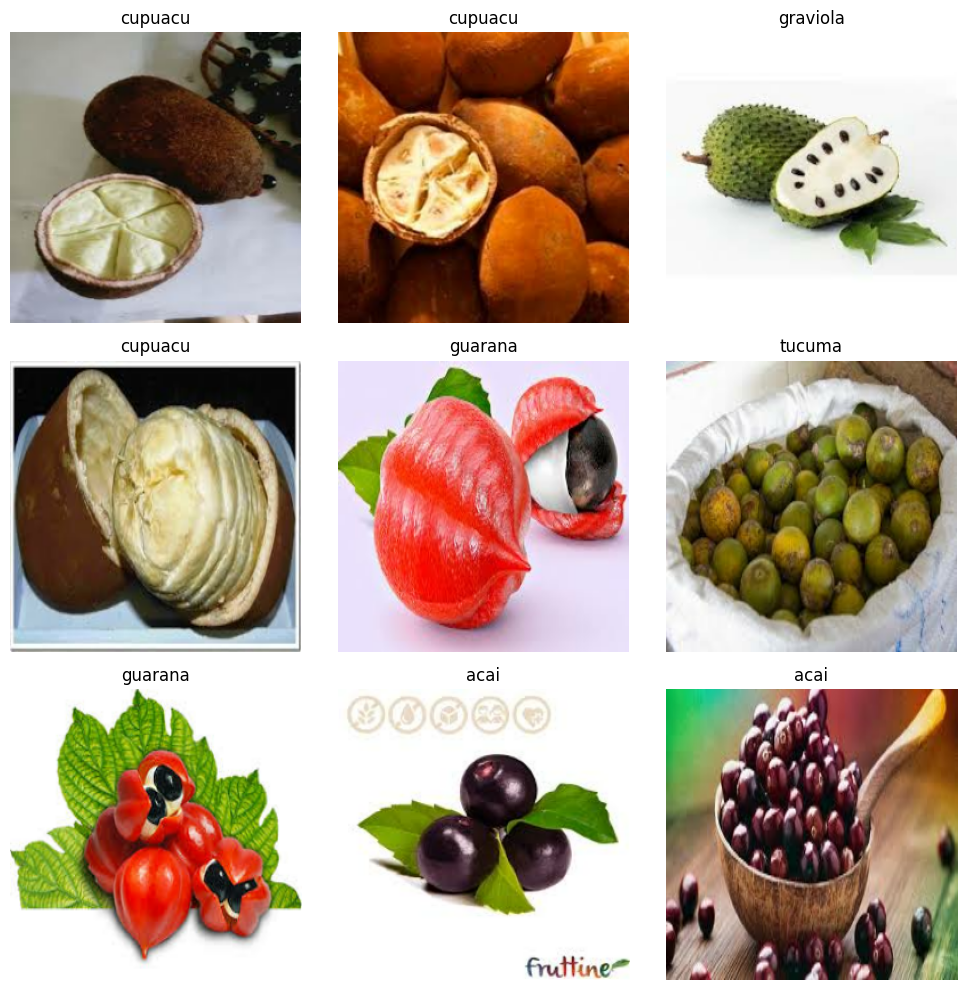

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

def display_dataset_images(train_ds):

    class_names = train_ds.class_names

    # this is for figure size
    plt.figure(figsize=(10, 10))

    # Iterate through the dataset
    for images, labels in train_ds.take(1):
        for i in range(min(9, len(images))):
            plt.subplot(3, 3, i+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

    plt.tight_layout()
    plt.show()


display_dataset_images(train_ds)

In [ ]:
from PIL import Image
import os

def check_corrupted_images(directory):
    """
    Check for corrupted images using Pillow (PIL).

    Args:
        directory (str): Path to the training directory

    Returns:
        list: Paths of corrupted images
    """
    corrupted_images = []

    # checking through directory
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check only image files
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                filepath = os.path.join(root, file)

                try:
                    # Try to open the image
                    with Image.open(filepath) as img:
                        img.verify()

                except Exception as e:
                    print(f"Corrupted image found: {filepath}")
                    corrupted_images.append(filepath)

    #
    if corrupted_images:
        print(f"\nTotal corrupted images found: {len(corrupted_images)}")
        for img in corrupted_images:
            print(f"- {img}")
    else:
        print("No Corrupted Images Found.")

    return corrupted_images

# Usage
train_directory = '/content/FruitinAmazon/train'
check_corrupted_images(train_directory)

No Corrupted Images Found.


[]

#Task 2: Loading and Preprocessing Image Data in keras:

In [ ]:
import tensorflow as tf
# Define image size and batch size
img_height = 128 # Example image height
img_width = 128 # Example image width
batch_size = 32
validation_split = 0.2 # 80% training, 20% validation
# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255) # Normalize pixel values to [0, 1]

In [ ]:
# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/FruitinAmazon/train',
  labels="inferred",
  label_mode="int",
  image_size=(img_height, img_width),
  interpolation="nearest",
  batch_size=batch_size,
  shuffle=True,
  validation_split=validation_split,
  subset="training",
  seed=123
)

Found 90 files belonging to 6 classes.
Using 72 files for training.


In [ ]:
# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

In [ ]:
# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
'/content/FruitinAmazon/train',
labels="inferred",
label_mode="int",
image_size=(img_height, img_width),
interpolation="nearest",
batch_size=batch_size,
shuffle=False,
validation_split=validation_split,
subset="validation",
seed=123
)

Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [ ]:
# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

#Task 3 - Implement a CNN with

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

# Initialize empty lists to store data
x_train = []
y_train = []
x_test = []
y_test = []

# Iterate through the training dataset
for images, labels in train_ds:
    # Convert the images tensor to a NumPy array and append
    x_train.extend(images.numpy())
    # Append labels
    y_train.extend(labels.numpy())

# Iterate through the validation dataset
for images, labels in val_ds:
    # Convert the images tensor to a NumPy array and append
    x_test.extend(images.numpy())
    # Append labels
    y_test.extend(labels.numpy())

# Convert lists to NumPy arrays
x_train = np.array(x_train, dtype="float32") / 255.0
x_test = np.array(x_test, dtype="float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [ ]:
print("X_train shape : ", x_train.shape)
print("X_test shape : ", x_test.shape)


X_train shape :  (72, 128, 128, 3, 1)
X_test shape :  (18, 128, 128, 3, 1)


In [ ]:
img_height = 128
img_width = 128
channels = 3  # RGB images
num_classes = 6
input_shape=(224, 224, 3)

In [ ]:
model = models.Sequential([
        # Convolutional Layer 1
        layers.Conv2D(
            filters=32,
            kernel_size=(3, 3),
            padding='same',
            strides=1,
            input_shape=input_shape
        ),
        layers.Activation('relu'),

        # Pooling Layer 1
        layers.MaxPooling2D(
            pool_size=(2, 2),
            strides=2
        ),

        # Convolutional Layer 2
        layers.Conv2D(
            filters=32,
            kernel_size=(3, 3),
            padding='same',
            strides=1
        ),
        layers.Activation('relu'),

        # Pooling Layer 2
        layers.MaxPooling2D(
            pool_size=(2, 2),
            strides=2
        ),

        # Flatten Layer
        layers.Flatten(),

        # Fully Connected Layers
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),

        # Dropout for regularization
        layers.Dropout(0.5),

        # Output Layer
        layers.Dense(num_classes, activation='softmax')
    ])